In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
import pathlib
data_dir = pathlib.Path('datasets/')
data_dir

WindowsPath('datasets')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

27000

In [4]:
forests = list(data_dir.glob('Forest/*.jpg'))
forests[:5]

[WindowsPath('datasets/Forest/Forest_1.jpg'),
 WindowsPath('datasets/Forest/Forest_10.jpg'),
 WindowsPath('datasets/Forest/Forest_100.jpg'),
 WindowsPath('datasets/Forest/Forest_1000.jpg'),
 WindowsPath('datasets/Forest/Forest_1001.jpg')]

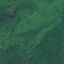

In [5]:
from IPython.display import Image
Image(forests[9])

In [6]:
data_dir.glob('')

<generator object Path.glob at 0x000001C105D88430>

In [7]:
highways = list(data_dir.glob('Highway/*.jpg'))
highways[:5]

[WindowsPath('datasets/Highway/Highway_1.jpg'),
 WindowsPath('datasets/Highway/Highway_10.jpg'),
 WindowsPath('datasets/Highway/Highway_100.jpg'),
 WindowsPath('datasets/Highway/Highway_1000.jpg'),
 WindowsPath('datasets/Highway/Highway_1001.jpg')]

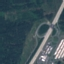

In [8]:
Image(highways[2])

In [9]:
industrial = list(data_dir.glob('Industrial/*.jpg'))
industrial[:5]

[WindowsPath('datasets/Industrial/Industrial_1.jpg'),
 WindowsPath('datasets/Industrial/Industrial_10.jpg'),
 WindowsPath('datasets/Industrial/Industrial_100.jpg'),
 WindowsPath('datasets/Industrial/Industrial_1000.jpg'),
 WindowsPath('datasets/Industrial/Industrial_1001.jpg')]

In [10]:
river = list(data_dir.glob('River/*.jpg'))
river[:5]

[WindowsPath('datasets/River/River_1.jpg'),
 WindowsPath('datasets/River/River_10.jpg'),
 WindowsPath('datasets/River/River_100.jpg'),
 WindowsPath('datasets/River/River_1000.jpg'),
 WindowsPath('datasets/River/River_1001.jpg')]

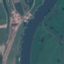

In [11]:
Image(river[5])

In [12]:
sealake = list(data_dir.glob('SeaLake/*.jpg'))
sealake[:5]

[WindowsPath('datasets/SeaLake/SeaLake_1.jpg'),
 WindowsPath('datasets/SeaLake/SeaLake_10.jpg'),
 WindowsPath('datasets/SeaLake/SeaLake_100.jpg'),
 WindowsPath('datasets/SeaLake/SeaLake_1000.jpg'),
 WindowsPath('datasets/SeaLake/SeaLake_1001.jpg')]

In [13]:
# train_batches = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.2, 
#                                                                zoom_range= 0.2,
#                                                                 fill_mode='nearest',
#                                                                 horizontal_flip=True,
#                                                                 rotation_range=20
#                                                                ).flow_from_directory(data_dir, target_size=(180,180),
#                                                                                     batch_size=32, class_mode='category')

# test_batches = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255).flow_from_directory(data_dir)

In [14]:
train_batches = tf.keras.utils.image_dataset_from_directory(data_dir, 
                                                           seed =123,
                                                           validation_split=0.2,
                                                           batch_size=32,
                                                           image_size=(180,180),
                                                           subset='training',
                                                           )

Found 27000 files belonging to 10 classes.
Using 21600 files for training.


In [15]:
valid_batches = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                           seed =123,
                                                           batch_size=32,
                                                           image_size=(180, 180),
                                                           subset='validation',
                                                           validation_split=0.2)

Found 27000 files belonging to 10 classes.
Using 5400 files for validation.


In [16]:
class_names = train_batches.class_names
class_names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

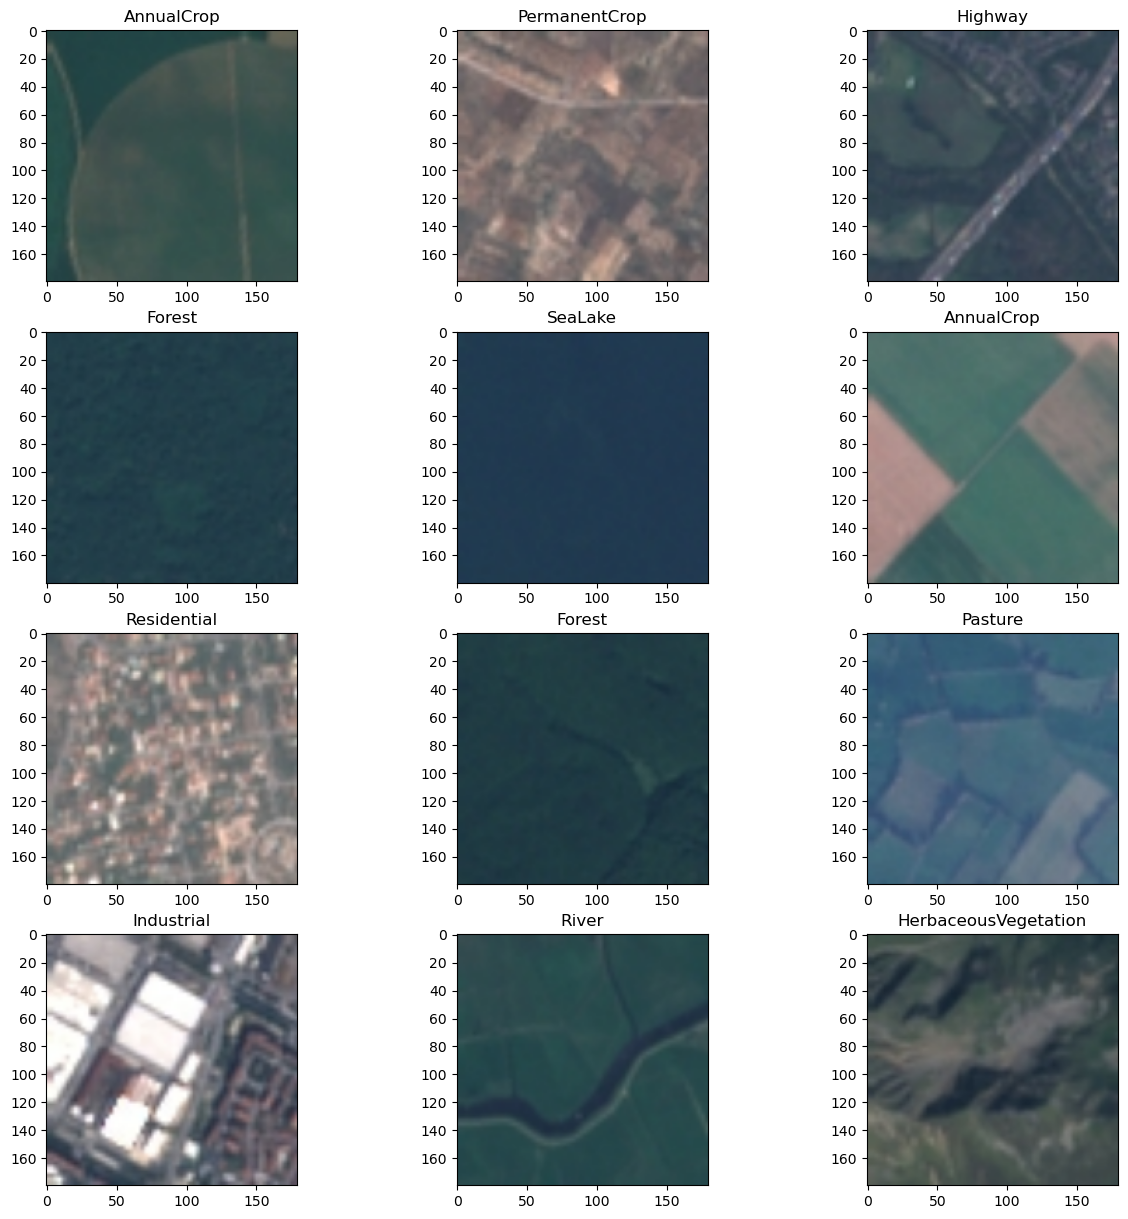

In [17]:
plt.figure(figsize=(15,15))
for image, label in train_batches.take(1):
    for i in range(12):
        plt.subplot(4,3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])

In [18]:
for image, label in train_batches:
    print(image.shape)
    print(label.shape)
    break

(32, 180, 180, 3)
(32,)


In [19]:
len(class_names)

10

In [20]:
train_batches = train_batches.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
valid_batches = valid_batches.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
normalization_layer = layers.Rescaling(1./255)

**Create a Convolution Neural Network using Sequential model**

`tf.keras.models.Sequential`

In [23]:
# model = Sequential([
#     layers.Conv2D(16, 3, (2,2) , activation='relu', padding ='same'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(16, 3, (2,2), activation='relu', padding ='same'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, (2,2), activation='relu', padding ='same'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, (2,2), activation='relu', padding ='same'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='sigmoid'),
    
# ])

In [24]:
model = Sequential([
    layers.Conv2D(16, 3  , activation='relu', padding ='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3 , activation='relu', padding ='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3 , activation='relu', padding ='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3 , activation='relu', padding ='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
    
])

In [25]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4),
             loss= tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])

In [26]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [25]:
hist = model.fit(train_batches, validation_data= valid_batches, 
         epochs=20,
          verbose= 2,
          batch_size =32
         )

Epoch 1/20
675/675 - 468s - loss: 1.3563 - accuracy: 0.5488 - val_loss: 0.9783 - val_accuracy: 0.6600 - 468s/epoch - 693ms/step
Epoch 2/20
675/675 - 455s - loss: 0.8495 - accuracy: 0.7030 - val_loss: 0.7854 - val_accuracy: 0.7259 - 455s/epoch - 674ms/step
Epoch 3/20
675/675 - 476s - loss: 0.7065 - accuracy: 0.7529 - val_loss: 0.7736 - val_accuracy: 0.7269 - 476s/epoch - 705ms/step
Epoch 4/20
675/675 - 552s - loss: 0.5994 - accuracy: 0.7909 - val_loss: 0.6679 - val_accuracy: 0.7615 - 552s/epoch - 818ms/step
Epoch 5/20
675/675 - 390s - loss: 0.5255 - accuracy: 0.8159 - val_loss: 0.7135 - val_accuracy: 0.7480 - 390s/epoch - 577ms/step
Epoch 6/20
675/675 - 308s - loss: 0.4638 - accuracy: 0.8383 - val_loss: 0.6602 - val_accuracy: 0.7733 - 308s/epoch - 456ms/step
Epoch 7/20
675/675 - 303s - loss: 0.4096 - accuracy: 0.8593 - val_loss: 0.5902 - val_accuracy: 0.8006 - 303s/epoch - 448ms/step
Epoch 8/20
675/675 - 303s - loss: 0.3560 - accuracy: 0.8771 - val_loss: 0.6506 - val_accuracy: 0.7844 - 

Our Land Cover model is overfitting as we can see that till 8th epochs our model was training fine but after 8th epochs it started to learn noises from the data. An Overfitting occurs when your model is performing better on training data but bad on validation data. This problem also happen when there is not enough data. 

To fix the overfitting problem

* We can use Data Augmentation and Dropout

        In Data Augmentation we create new data using our existing data by flipping vertically or horizontally, zooming, rotating at some angle, changing the contrast, resizing etc
    
        Dropout. In this we randomly remove the neurons from the different hidden layers.

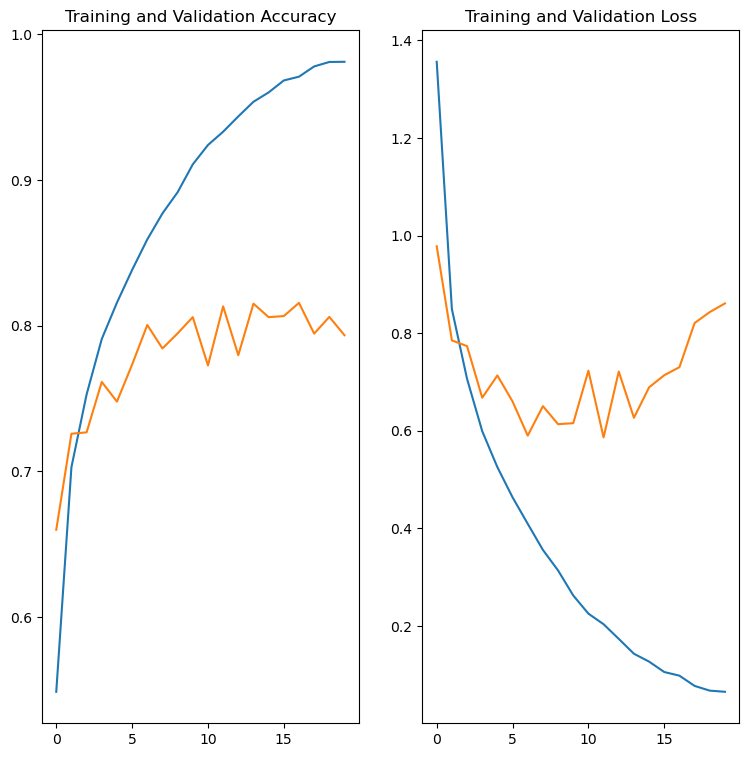

In [32]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = 20
epochs_range = range(epochs)
plt.figure(figsize = (9, 9))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
model.save('overfitting_landcover.h5')

In [30]:
tf.keras.layers.RandomRotation??

In [27]:
data_augmentation = Sequential([
    #tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomZoom(0.1)
])

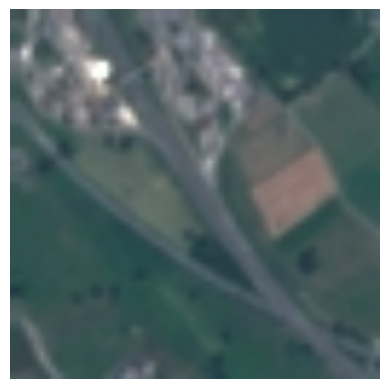

In [28]:
for image, _ in train_batches.take(1):
    for i in range(9):
        
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.axis('off')
        break

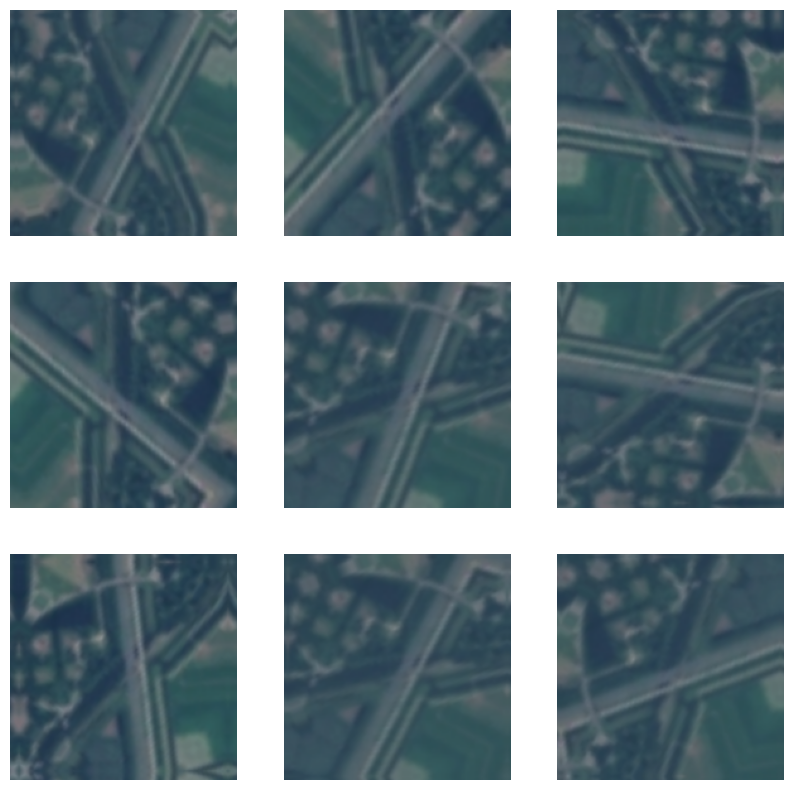

In [29]:
plt.figure(figsize=(10,10))
for image, _ in train_batches.take(1):
    for i in range(9):
        augmented_images = data_augmentation(image)
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

This is augmented images. we can see that all image little bit different than others.

In [41]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3  , activation='relu', padding ='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3 , activation='relu', padding ='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3 , activation='relu', padding ='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3 , activation='relu', padding ='same'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

### Compile and train the model

In [42]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4),
             loss= tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [66]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(patience = 3, monitor = 'loss')

In [69]:
epochs = 10

In [70]:
hist = model.fit(train_batches,
                validation_data= valid_batches,
                epochs=epochs, verbose =2, callbacks= [callback])

Epoch 1/10
675/675 - 592s - loss: 1.0206 - accuracy: 0.6321 - val_loss: 0.9410 - val_accuracy: 0.6511 - 592s/epoch - 878ms/step
Epoch 2/10
675/675 - 564s - loss: 0.9307 - accuracy: 0.6651 - val_loss: 0.8388 - val_accuracy: 0.7156 - 564s/epoch - 835ms/step
Epoch 3/10
675/675 - 580s - loss: 0.8653 - accuracy: 0.6862 - val_loss: 0.8004 - val_accuracy: 0.7139 - 580s/epoch - 859ms/step
Epoch 4/10
675/675 - 592s - loss: 0.8193 - accuracy: 0.7061 - val_loss: 0.7457 - val_accuracy: 0.7380 - 592s/epoch - 877ms/step
Epoch 5/10
675/675 - 602s - loss: 0.7820 - accuracy: 0.7172 - val_loss: 0.7645 - val_accuracy: 0.7287 - 602s/epoch - 891ms/step
Epoch 6/10
675/675 - 688s - loss: 0.7590 - accuracy: 0.7269 - val_loss: 0.7471 - val_accuracy: 0.7352 - 688s/epoch - 1s/step
Epoch 7/10
675/675 - 451s - loss: 0.7453 - accuracy: 0.7339 - val_loss: 0.6920 - val_accuracy: 0.7657 - 451s/epoch - 669ms/step
Epoch 8/10
675/675 - 415s - loss: 0.7181 - accuracy: 0.7435 - val_loss: 0.6518 - val_accuracy: 0.7713 - 415

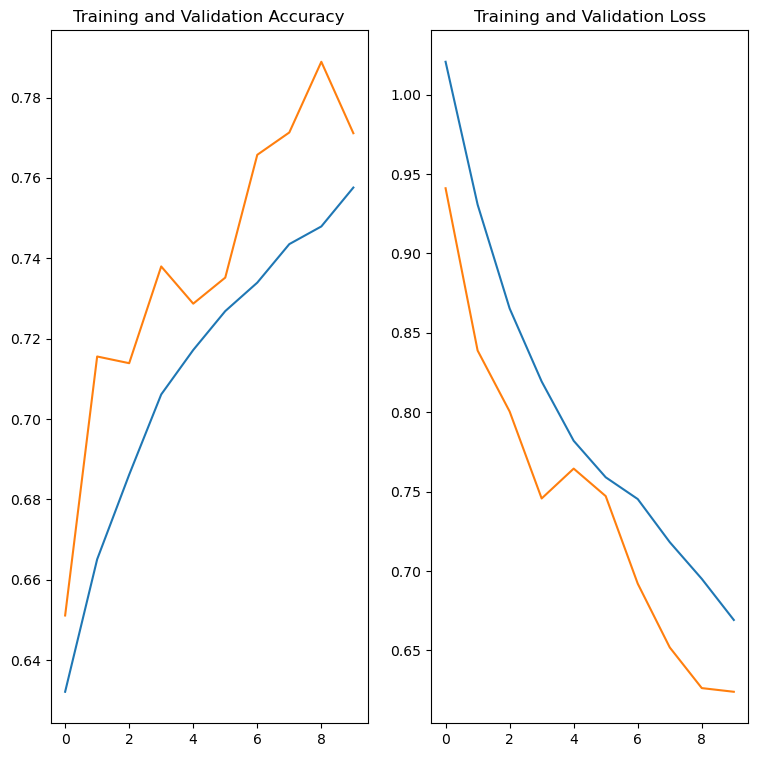

In [71]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize = (9, 9))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
 model.save('land_cover.h5')

In [73]:
def preprocess_img(img_dir):
    
    img = tf.keras.utils.load_img(img_dir, target_size=(180, 180))
    img_array = tf.keras.utils.img_to_array(img)
    # create batch
    img_array = tf.expand_dims(img_array, 0)
    
    return img_array

In [74]:
def predict_land_cover(model, img_array):
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print('This image is most likey belongs to {} to a {:.2f} percent confidence.'.
         format(class_names[np.argmax(score)], 100 *np.max(score)))

In [76]:
img_array = preprocess_img('Dragonfly_klit-3.png')

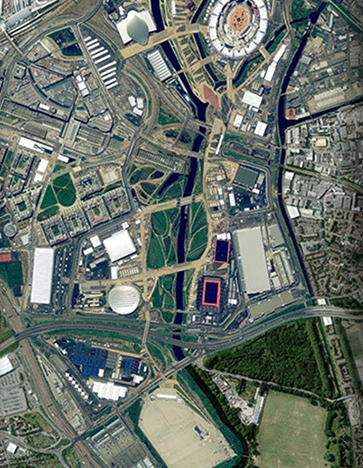

In [24]:
Image('Dragonfly_klit-3.png')

In [77]:
predict_land_cover(model, img_array)

1/1 [==============================] - 0s 307ms/step
This image is most likey belongs to Industrial to a 16.66 percent confidence.


In [78]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 51ms/step


In [79]:
class_names[np.argmax(pred)]

'Industrial'

In [80]:
pred

array([[6.6875105e-10, 3.0341218e-14, 1.5122399e-01, 6.1297808e-03,
        6.3136917e-01, 6.4770789e-12, 4.0355476e-07, 2.1108986e-01,
        1.8678236e-04, 2.9855905e-21]], dtype=float32)

In [81]:
np.sum(pred)

1.0

In [84]:
img_array = preprocess_img('high.webp')
predict_land_cover(model, img_array)

1/1 [==============================] - 0s 73ms/step
This image is most likey belongs to Residential to a 23.13 percent confidence.


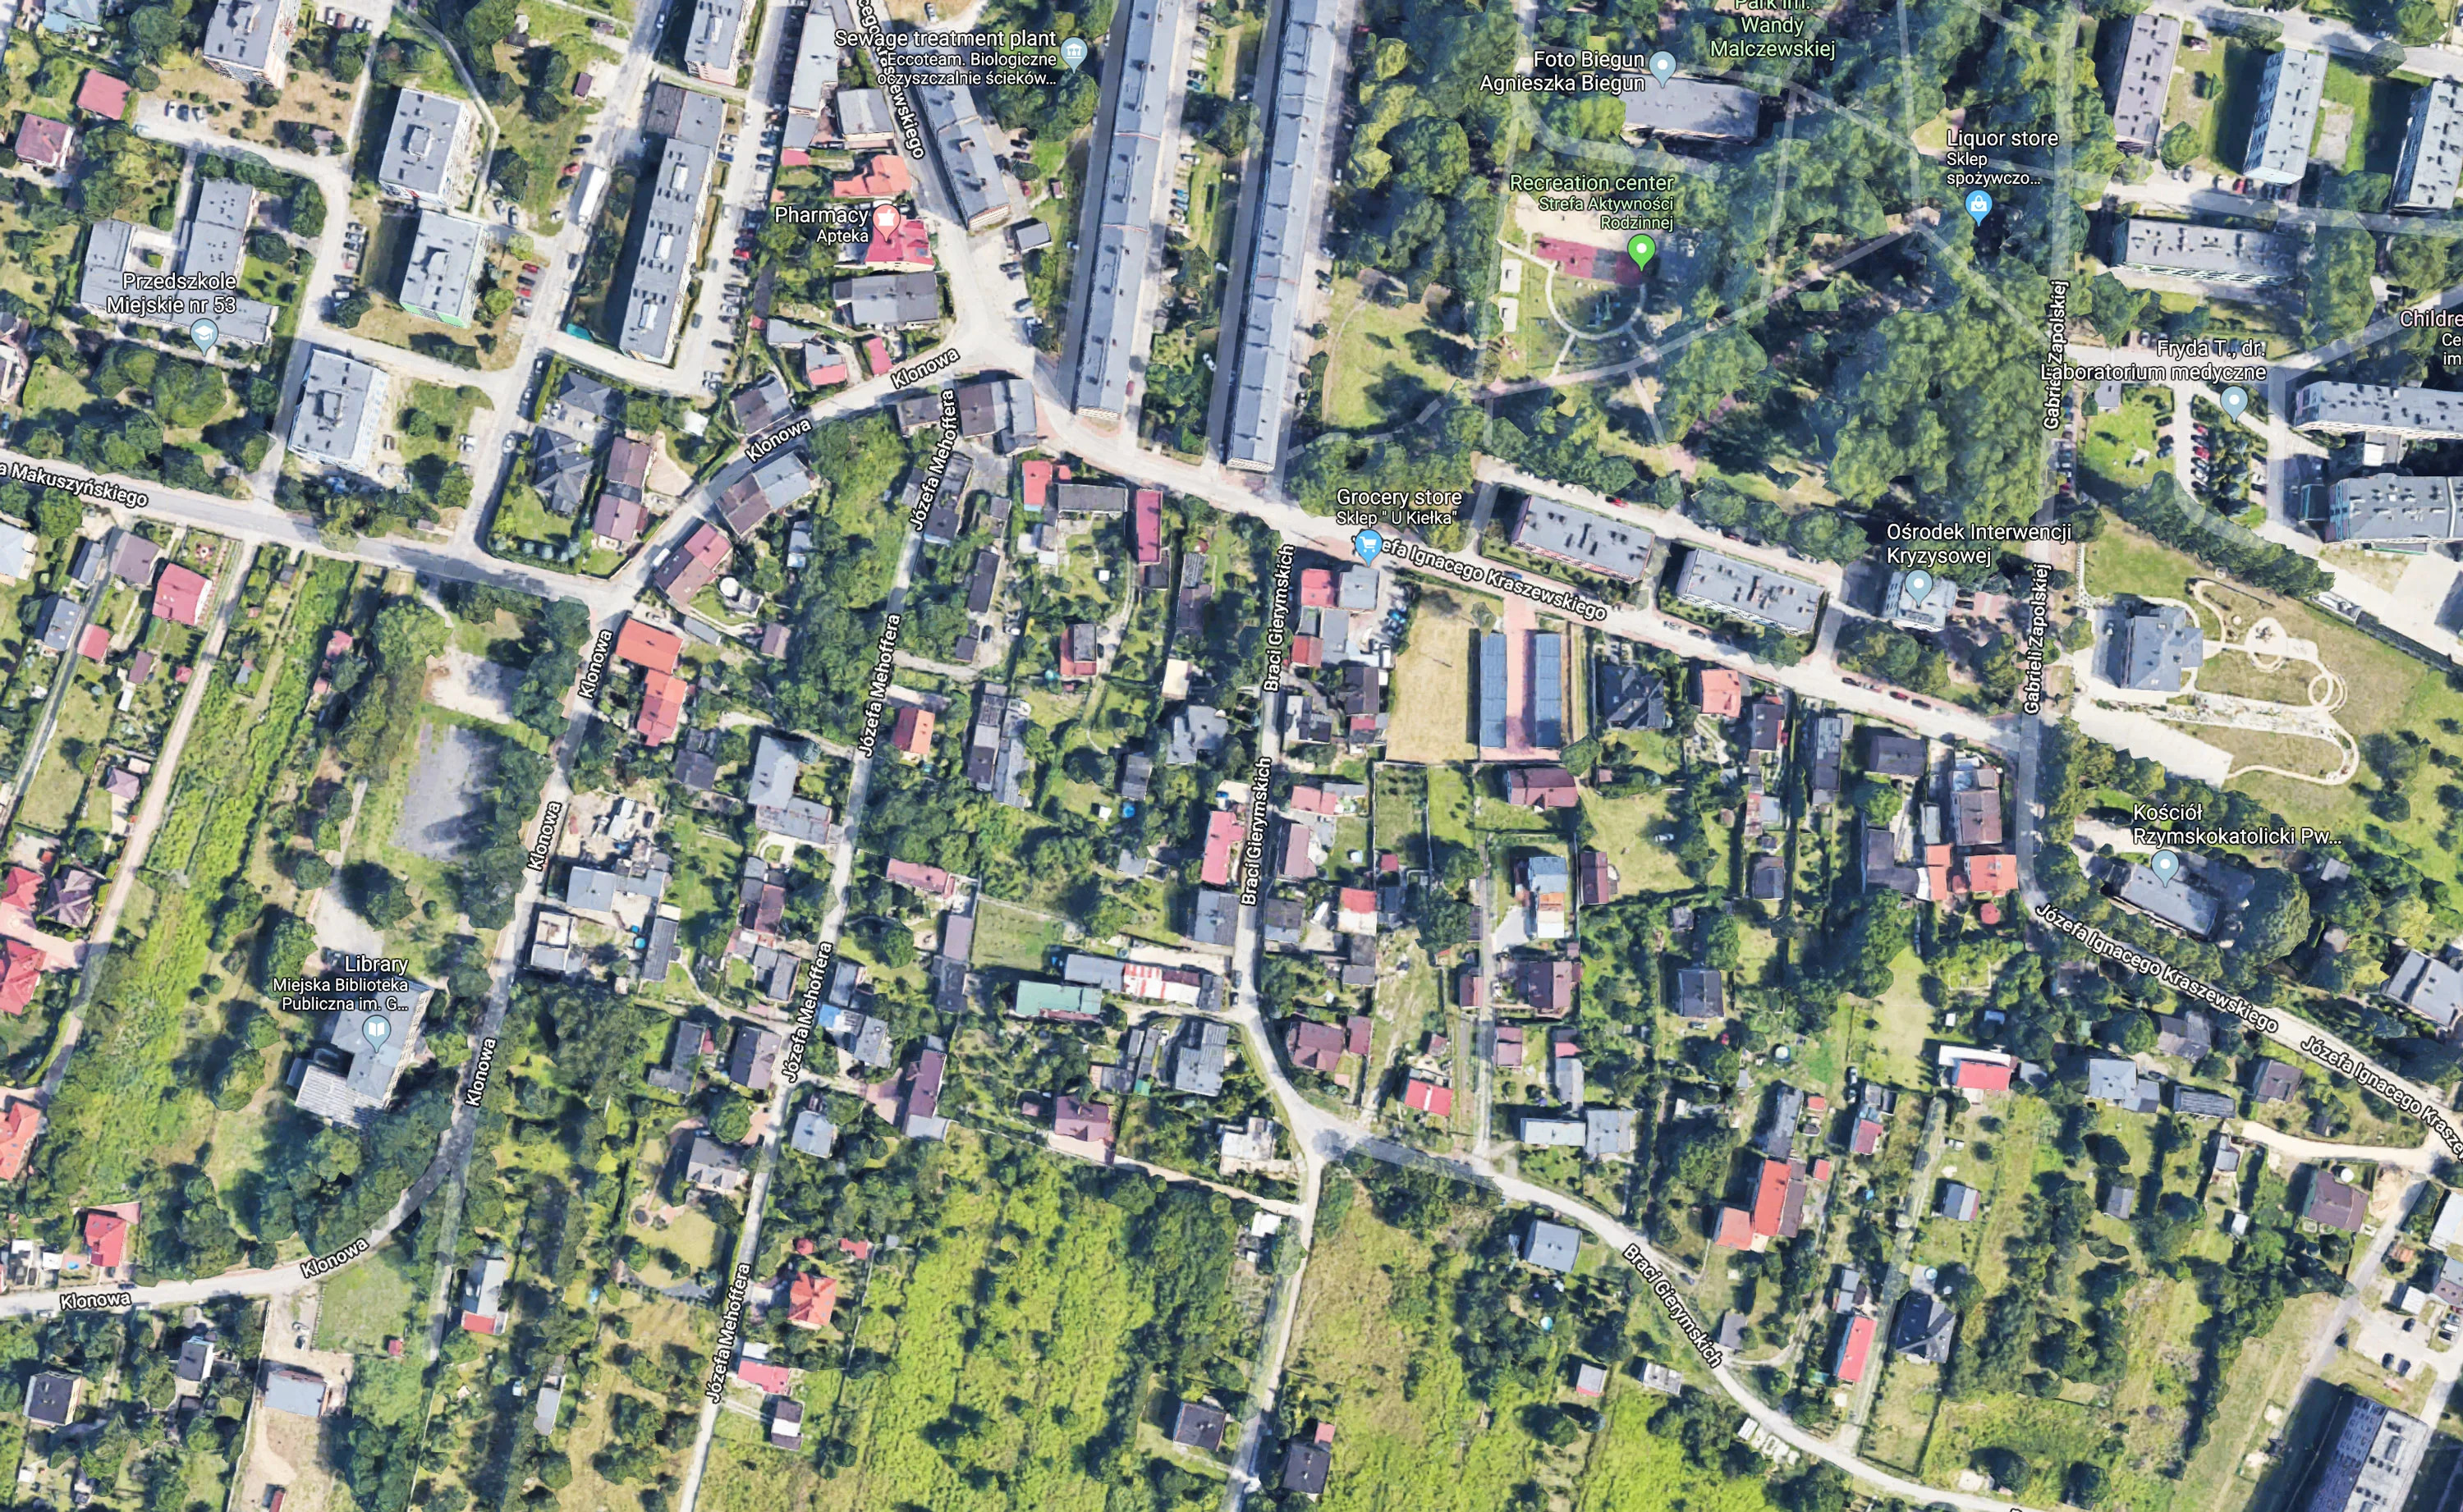

In [23]:
Image('residential.jpg')

In [87]:
img_array = preprocess_img('residential.jpg')
predict_land_cover(model, img_array)

1/1 [==============================] - 0s 46ms/step
This image is most likey belongs to Residential to a 22.90 percent confidence.
